In [1]:
# Notebook imports, do not care about them!
import jdc

# Introdução

Redes Neurais de Múltiplas Camadas (RNM), ou Multilayer Perceptron (MLP), são modelos computacionais inspirados no sistema nervoso humano, compostas por estruturas matemáticas que simulam os neurônios e suas conexões. Os usos mais comuns desses modelos consistem em tarefas de classificação e regressão, 
o que favorece a aplicação em diversas áreas de pesquisa, sendo uma delas
a de Visão Computacional.

Para compreender as RNM, é importante primeiramente conhecer dois de seus aspectos fundamentais: os **neurônios** e a **arquitetura em camadas**.

## Neurônios
Um neurônio é uma estrutura que aceita como argumento um vetor $\mathbf{x} = \langle x_1, x_2, \ldots, x_n \rangle \in \mathbb{R}^n$
de entrada e **responde com um valor real** de saída. Cada neurônio está relacionado a um vetor de pesos $\mathbf{w} = \langle w_1, w_2, \ldots, w_n \rangle \in \mathbb{R}^n$, de forma que cada componente $x_i$ da entrada é associada ao peso $w_i$. Ao receber a entrada,
o neurônio responde com o valor $f(\mathbf{x}\cdot\mathbf{w} + b)$, onde $f$ é chamada de 
**função de ativação**; $\mathbf{x}\cdot\mathbf{w} = \sum_i x_i \cdot w_i$, ou seja, 
o produto interno entre $\mathbf{x}$ e $\mathbf{w}$, também chamado de $net$ do neurônio; e $b$ é 
uma constante real chamada *bias*, cuja principal função é permitir um ajuste fino 
do valor de saída por meio de um deslocamento horizontal da função de ativação.

Uma função comum de ativação é a **sigmoide**, expressa pela equação:
$$f(x) = \frac{1}{1 + e^{-x}}.$$

Ela possui a importante propriedade de ser contínua e derivável em $(-\infty, +\infty)$,
o que favorece o algoritmo de treinamento a ser em breve explicado, apesar de existirem algumas desvantagens em sua utilização.


## Arquitetura em camadas

Uma RNM é organizada em uma sequência de $k > 2$ camadas de neurônios, denotadas aqui por $L_0, L_1, \ldots, L_{k-1}$. O tamanho de uma camada $L_i$, denotado aqui por $tam\;L_i$, é a quantidade de neurônios que ela possui. A camada $L_0$ é dita de entrada, na qual existe um **neurônio de entrada** para cada componente do vetor de entrada da rede. Esses neurônios se diferenciam dos demais porque,
ao invés de aceitarem todo o vetor, recebem apenas uma componente e simplesmente a **transmitem** para o interior da rede, sem 
a aplicação da função de ativação. Já a camada $L_{k-1}$ é dita de saída,
e a sua resposta é a resposta da rede.

O que viabiliza o funcionamento do modelo são as conexões entre essas camadas, e elas podem ocorrer de diversas maneiras na rede. Aqui,  
o objeto de estudo são as **redes densas *feedforward***, em que cada neurônio da camada $L_i$ se conecta com
todos os neurônios da camada $L_{i+1}$, $i = 0,\ldots, k-2$, de maneira que o vetor de entrada dos neurônios da camada $L_{i+1}$ é o vetor composto pelas
respostas dos neurônios da camada $L_{i}$. Assim, um neurônio na camada $L_{i+1}$ recebe, como entrada, um vetor
de dimensão $tam\;L_i$, $i=0,1, \ldots, k-2$.

Cada conexão entre neurônios pode ser vista como associada ao peso que o neurônio
atribui ao valor por ela provido. Essa visão possibilita a utilização de uma
notação muito útil para se trabalhar com pesos: denota-se por $w_{ij}^l$ o peso 
da conexão entre o neurônio $j$ da camada $l-1$ com o neurônio $i$ da camada $l$,
$l = 1, \ldots, k-1$. Mais ainda, é possível representar todas as conexões entre
duas camadas por uma matriz de pesos $\mathbf{W}^l = (w_{ij}^l)$ de dimensão $tam\;L_{l} \times tam\;L_{l-1}$.
Para facilitar a identificação dos *biases* de cada neurônio em uma camada, denota-se por 
$\mathbf{b}^l = \langle b^l_1, b^l_2, \ldots, b^l_{tam\;L_l} \rangle$ os *biases* 
dos neurônios da camada $L_l$, sendo $b^l_i$ o *bias* do neurônio $i$ na camada $L_l$.

Sabendo disso, já é possível iniciar a implementação em Python da RNM!

### Implementando a classe `MultilayerNeuralNetwork`

Como o objetivo é
produzir um módulo reutilizável, os recursos de orientação a objetos da linguagem Python
serão aplicados. Além disso, o pacote `numpy` será utilizado para a manipulação de matrizes. 

A programação tem início com a importação do `numpy` e a declaração da classe `MultilayerNeuralNetwork`, a qual encapsulará todos os dados e métodos necessários ao
funcionamento e à utilização da rede, como a matriz de pesos, a arquitetura e as rotinas de treinamento:

In [2]:
import numpy as np
import random

class MultilayerNeuralNetwork:
    '''A Multilayer Neural Network implementation.'''

Essa é apenas uma classe, e nada tem a ver com redes neurais além do nome simplesmente. O próximo passo é criar um **construtor**, método que sempre será chamado quando alguém
criar (ou, mais tecnicamente, instanciar) a rede neural. Nele, é importante garantir
a criação e inicialização da arquitetura, o que implica na configuração das camadas (quantas e quantos neurônios devem possuir), das matrizes de pesos e dos vetores de *bias*.  Estas serão inicializadas com valores aleatórios, seguindo
a distribuição normal, e, em seguida, normalizadas pela raiz quadrada da quantidade de neurônios da camada correspondente. A inicialização dos pesos é um tópico importante, para o qual existem diversas propostas, mas que será abstraído neste momento por economia de tempo.
Além disso, um parâmetro `alpha` será acrescentado, 
cuja existência será justificada mais adiante. Portanto, o construtor receberá do
usuário a **arquitetura da rede**, no formato $[tam\;L_0, tam\;L_1, \ldots, tam\;L_{k-1}]$, e o tal `alpha`:

In [3]:
    %%add_to MultilayerNeuralNetwork
    def __init__(self, arch = [1,2,1], alpha = 0.1):
        '''Initialize the network.'''
        
        self.W = {}
        self.B = {}
        self.alpha = alpha
        self.arch = arch
        
        # Initialize the weight matrix and biases with normalized random values
        for i in np.arange(1,len(self.arch)):
            # Weights
            w = np.random.randn(self.arch[i], self.arch[i-1])
            self.W[i] = w/np.sqrt(self.arch[i])
            # Biases
            b = np.random.randn(self.arch[i],1)
            self.B[i] = b/np.sqrt(self.arch[i])

Como será utilizada a função sigmoide para a ativação dos neurônios, é importante
que ela e sua derivada estejam implementadas na classe:  

In [4]:
    %%add_to MultilayerNeuralNetwork
    def sigmoid(self, x):
        '''Sigmoid function.'''
        return 1.0/(1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        '''Derivative of the sigmoid function, considering that x is the result
        of applying the sigmoid function to the net.
        '''
        return x * (1 - x)

Com isso, é possível instanciar uma rede, mesmo que não se possa fazer nada com ela ainda, apenas para checar a sua estrutura:

In [21]:
# Criando uma arquitetura com 2 neurônios na camada de entrada, uma camada escondida com 3 neurônios e 1 neurônio
# na camada de saída.
neuralnet = MultilayerNeuralNetwork(arch = [2,3,1], alpha = 0.5)
print(neuralnet.W)
print(neuralnet.B)

{1: array([[ 0.44721243, -1.13009679],
       [ 0.48586539, -0.16278593],
       [-0.40227884, -0.94164842]]), 2: array([[-1.62313517, -1.68975618, -0.82730578]])}
{1: array([[-0.05423398],
       [-1.28780246],
       [-0.722561  ]]), 2: array([[ 0.25346544]])}


### Respostas das camadas

Note que cada camada produz um vetor de resposta composto pelas respostas individuais
de cada um de seus neurônios. Denote por $\mathbf{a^l} = \langle a^l_1, a^l_2, \ldots, a^l_{tam\; L_l} \rangle$ esse vetor para a camada $L_l$. Como visto, ele deverá ser a entrada para a camada seguinte, mas os seus valores serão combinados de forma particular
pela matriz de pesos $\mathbf{W}^{l+1}$. A expressão

$$\mathbf{z}^l = \mathbf{W}^{l+1}\cdot\mathbf{a^l} + \mathbf{b}^l$$

produz um vetor cujos componentes são os valores $net$ de cada neurônio da camada
$L_{l+1}$. Sabendo disso, qual seria a expressão para o vetor de saída da camada $L_{l+1}$, ou seja, para $\mathbf{a}^{l+1}$?
Basta aplicar a função de ativação a cada componente do vetor obtido! Considerando-se a aplicação da função ponto a ponto, ou seja, $f(\langle x_1, x_2, \ldots, x_n \rangle) = \langle f(x_1), f(x_2), \ldots, f(x_n) \rangle$, tem-se que:

$$\mathbf{a}^{l+1} = f(\mathbf{W}^{l+1}\cdot\mathbf{a^l} + \mathbf{b}^l) = f(\mathbf{z}^l).$$

O conhecimento adquirido até este ponto é suficiente para se entender a arquitetura de uma rede neural e como computar as saídas das suas camadas de neurônios a partir 
de um vetor de entrada. Já podemos implementar uma função muito importante da nossa rede neural: dado um vetor de entrada, qual é o vetor de resposta da rede, ou seja, qual o vetor na camada de saída? Essa função é comumente chamada de `predict`, pois é utilizada para gerar a previsão (resposta) da rede a partir de uma entrada. Note como é simples e advém diretamente da definição:

In [22]:
    %%add_to MultilayerNeuralNetwork
    def predict(self, X, outputs=False):
        ''' Given an input column vector X, compute the output of the network. '''
        # Set the result of the input layer
        p = np.atleast_2d(X).T
        # Store outputs
        if outputs: 
            A = {}
            A[0] = p
        # Compute the output of each layer, following the definition
        for layer in np.arange(1, len(self.arch)):
            p = self.sigmoid(np.dot(self.W[layer], p) + self.B[layer])
            if outputs: A[layer] = p
        # Return accordingly to outputs option
        return A if outputs else p

Ocorre que apenas saber como obter a saída da rede não resolve problema algum: as matrizes de pesos aleatórios 
tornam o modelo inútil. Ele necessita se ajustar (lê-se "aprender")
para solucionar os problemas com os quais é confrontado, e é disso que 
trataremos a partir de agora!

# Aprendizado em uma RNM

O modelo de aprendizagem de redes neurais é geralmente o **supervisionado**, pois faz
uso de exemplos representantes da verdade (*ground truth*) para fazer
com que a rede gere as respostas desejadas após uma **etapa de treinamento**. É como se um professor
apresentasse a entrada, a rede respondesse e ele informasse qual foi o 
erro cometido. A rede, com base nisso, modifica sua estrutura (suas matrizes
 de pesos) para que o erro, da próxima vez que o professor mostrar
 o exemplo, seja garantidamente menor. Esse processo termina quando algum critério de parada é atingido. Os mais comuns são o erro máximo e o número de ciclos ou *epochs*.
 
 O erro cometido pela rede, ao responder para dado exemplo $\langle \mathbf{x}, \mathbf{y} \rangle$, é modelado matematicamente por uma **função de custo**
 $C_x:\mathbb{R}^{k+1} \to \mathbb{R}$, onde $k$ é a quantidade de pesos. As funções que podem desempenhar esse papel devem cumprir alguns requisitos
 básicos e dependem dos valores dos pesos e dos *biases*. Uma das mais comuns é a do **erro quadrático**, de equação:
 
 $$C_x = \frac 1 2 ||\mathbf{y}- \mathbf{a}^{k-1}(\mathbf{x})||^2 = \frac 1 2 \sum_i (y_i - a^{k-1}_i(\mathbf{x}))^2,$$
  $a^{k-1}(\mathbf{x})$ é a saída da última camada da rede para o exemplo $\langle \mathbf{x}, \mathbf{y} \rangle$ (que nossa rede já sabe computar). Note que
 quanto maior a diferença entre a verdade e a saída da rede, maior o valor dessa
 função, o que mostra sua adequação para representar o erro.
 
 A fim de representar o erro com respeito a todos os exemplos, define-se também a função
 de custo $\bar{C}:\mathbb{R}^{k+1} \to \mathbb{R}$, dada pela média dos erros para cada exemplo, ou seja:
 
 $$
     \bar{C} = \frac 1 n \sum_{\langle \mathbf{x}, \mathbf{y} \rangle \in \mathcal{D}} C_x = \frac{1}{2n} \sum_{\langle \mathbf{x}, \mathbf{y} \rangle \in \mathcal{D}} ||\mathbf{y}- \mathbf{a}^{k-1}(\mathbf{x})||^2.
 $$ 
 
 Precisaremos, em nossa implementação, do cálculo da função de custo quadrática. Façamos, pois:

In [83]:
    %%add_to MultilayerNeuralNetwork
    def quadratic_loss(self, X, targets):
        ''' Compute the total quadratic loss, given a matrix of data. '''
        targets = np.atleast_2d(targets).T
        predictions = self.predict(X)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        return loss    

 Assim, o objetivo do treinamento é fazer com que o valor de $C_x$ (e $\bar{C}$, consequentemente), para cada exemplo $\langle \mathbf{x}, \mathbf{y} \rangle$,
 seja menor a cada ciclo. Como $C_x$ é função dos pesos e dos *biases*, nada melhor que buscar ajustá-los a fim de alcançar esse objetivo. Esse ajuste ocorre por meio de algum
 **método de otimização**, cujo objetivo é encontrar um conjunto de valores para pesos e *biases* tal que o valor de $\bar{C}$ seja tão menor quanto se queira. Um método 
 muito utilizado para tanto chama-se **gradiente descendente**, do qual a próxima seção tratará.
 
 ## Gradiente descendente
 
 Fujamos do escopo das redes neurais, e tratemos do problema geral de minimizar uma função
 de múltiplas variáveis $C:\mathbb{R}^n \to \mathbb{R}$. Queremos encontrar o vetor $\mathbf{v} = \langle v_1, v_2, \ldots, v_n \rangle$ tal que $C(\mathbf{v}) = C(v_1, v_2, \ldots, v_n)$ seja um mínimo global de $C$.
 
 Para conseguir a intuição sobre o método, vale reduzir a dimensão de entrada de $C$ para
 duas variáveis, $v_1$ e $v_2$, e imaginar que seu gráfico assume a forma de um vale. Por exemplo:
 

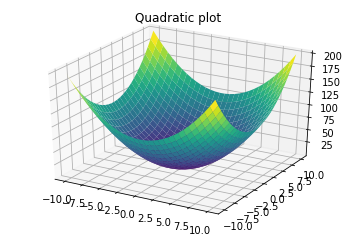

In [8]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

def quad(x,y):
    return x**2 + y**2

x = np.linspace(-10,10,30)
y = np.linspace(-10,10,30)

X,Y = np.meshgrid(x,y)

Z = quad(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Quadratic plot')

A função acima é bem simples, devemos concordar, e, apenas observando seu gráfico, é possível encontrar o mínimo. Também, utilizando técnicas primárias de cálculo, é possível encontrar o mínimo global sem muito esforço nesse caso. Porém, quando lidamos com aprendizado, geralmente estamos interessados em minimizar funções de dezenas, centenas, milhares de variáveis! É por isso que as técnicas tradicionais de cálculo se tornam inviáveis, e outros métodos entram em cena.

O gradiente descendente, sendo um deles, não busca encontrar um mínimo global, mas sim **algum mínimo para a função**. Isso pode ser um problema em alguns casos, mas não se mostra um empecilho grave para o seu uso em muitas aplicações de redes neurais. Imagine uma bola colocada em algum ponto arbitrário do vale mostrado no gráfico acima. Nossa experiência diz que ela começará a rolar até o ponto mais baixo do vale, e esse fato nos dá uma heurística para encontrar um mínimo da função: encontremos uma maneira de mover a bola nas direções
$v_1$ e $v_2$ de forma que ela sempre esteja descendo o vale! 

Já que queremos mover a bola, vamos representar o deslocamento por um vetor $\Delta v = \langle \Delta v_1, \Delta v_2 \rangle$. Assumindo a bola inicialmente na posição $v = \langle v_1, v_2 \rangle$, qual será a mudança no valor de $C$ causada por esse deslocamento? Ou seja, como podemos estimar o valor de $\Delta C = C(v+\Delta v)-C(v)$?
Do polinômio de Taylor para o caso Multivariável, temos que

$$\Delta C \approx \nabla C(v) \cdot \Delta v = \left \langle \frac{\partial C}{\partial v_1}, \frac{\partial C}{\partial v_2} \right \rangle \cdot \langle \Delta v_1, \Delta v_2 \rangle ^T = \frac{\partial C}{\partial v_1}\Delta v_1 + \frac{\partial C}{\partial v_2} \Delta v_2.$$

Queremos reduzir o valor de $C$, correto? Para isso, devemos escolher um valor de $\Delta v$ apropriado, tal que $\Delta C < 0$. Pela equação acima, isso se torna muito fácil! Vamos tomar $\Delta v$ como

$$\Delta v = -\alpha \nabla C^T,$$
onde $\alpha \in \mathbb{R}_+$. Ainda não convencido de que o $\Delta C$ causado por essa variação $\Delta v$ seja negativa? Vamos substituir:

$$\Delta C \approx \nabla C \cdot \Delta v = \nabla C \cdot (-\alpha \nabla C^T) = -\alpha (\nabla C \cdot \nabla C^T ) = -\alpha ||\nabla C||^2 \leq 0,$$
já que $||\nabla C||^2 \geq 0$ e $\alpha > 0$. Isso nos garante que, sempre que escolhermos o $\Delta v$ daquela forma, o valor do $C$ (o valor do erro!) sempre vai diminuir (claro, dentro dos limites da aproximação).

Observe que utilizamos, aqui, uma função de duas variáveis, como forma de simplificação. Porém, note que, nas equações vetoriais acima, esse fato não se mostrou nada relevante! De fato, não importa a dimensão: a regra do gradiente descendente funcionará, e é por isso que podemos utilizá-la em nossa rede neural! Assim, para reduzirmos o valor da função de custo $C$, alteraremos os pesos $\mathbf w$ e os biases $\mathbf b$ (as variáveis de $C$) pela regra abaixo, considerando a aplicação em cada variável:

$$w_k \gets w_k + (-\alpha \frac{\partial C}{\partial w_k})$$
$$b_l \gets b_l + (-\alpha \frac{\partial C}{\partial b_l})$$

No contexto das redes, o parâmetro $\alpha$ se chama **taxa de aprendizado** (*learning rate*) e, geralmente assumindo um valor pequeno (0.05, por exemplo), almeja diminuir o risco de provocarmos um $\Delta C$ muito elevado, o que poderia representar uma fuga de um ponto mínimo, ou um muito pequeno, o que atrasaria o processo de otimização.

### O gradiente descendente estocástico

Suponha que nosso conjunto de treino $\mathcal{D}$ possua muitas instâncias. Como 
$C = \sum_{x \in \mathcal{D}} C_x,$
computar $\nabla C$ seria muito custoso, pois envolveria computar todos os valores
$\nabla C_x$ e depois fazer $\nabla C = \frac{1}{n} \sum_{x \in \mathcal{D}} \nabla C_x$.
Isso poderia atrasar muito o treinamento! 

O que comumente se faz é adaptar o método do gradiente descendente para sua versão
estocástica. Isso significa particionar aleatoriamente o conjunto $\mathcal D$ em uma família de conjuntos
$\{\mathcal{D_i}\}_i$ de mesma cardinalidade (tamanho) $m$. Seja $\mathcal{D_j} = \{x^j_1, x^j_2, \ldots, x^j_m\}$ algum desses conjuntos e suponha $m$ suficientemente grande.
Consideramos que a média entre os $\nabla C_{x^j_k}$ se aproxime da média dos $\nabla C_{x}$, ou seja:

$$\frac{\sum_{k = 1}^m \nabla C_{x^j_k}}{m} \approx \frac{\sum_{x \in \mathcal{D}} \nabla C_x}{n} = \nabla C.$$

Fantástico! Agora não precisamos pegar sempre o conjunto inteiro e gigantesco $\mathcal{D}$ para treinar a rede! Basta pegarmos porções menores (chamadas *mini-batches*), estimar $\Delta C$ utilizando a aproximação acima, e atualizar os pesos e *biases*! Na prática, tomamos um conjunto com $m$  pontos arbitrários, $\mathcal{D_j} = \{x^j_1, x^j_2, \ldots, x^j_m\}$, e executamos as atualizações:

$$w_k \gets w_k + (-\frac{\alpha}{m} \sum_{p = 1}^m \frac{\partial C_{x^j_p}}{\partial w_k})$$
$$b_l \gets b_l + (-\frac{\alpha}{m} \sum_{p = 1}^m \frac{\partial C_{x^j_p}}{\partial b_l})$$

Caso o treinamento ainda não seja o bastante, tomamos outro conjunto de tamanho $m$,
e executamos as atualizações. Isso se repete até que o conjunto $\mathcal{D}$
se exaura, marcando o fim de uma *epoch* do treino. As próximas *epochs* repetirão esse processo.

Que tal implementarmos nosso *stochastic gradient descent* em nossa rede neural?

In [159]:
    %%add_to MultilayerNeuralNetwork
    def stochastic_gradient_descent(self, D, batch_size):
        ''' Update the weights and bias through stochastic gradient 
        descent optimization. '''
        # Get the amount of data points
        train_size = len(D)
        # Shuffle the data
        random.shuffle(D)
        # Obtain mini-batches
        mini_batches = [D[k : k + batch_size] 
            for k in range(0, train_size, batch_size)]
        # Update weights and biases
        for mini_batch in mini_batches:
            self.optimize_mini_batch(mini_batch)
    
    def optimize_mini_batch(self, mini_batch):
        ''' Given a minibatch {<x1,y1>,<x2,y2>,...,<xm,ym>}, optimize the cost function. '''
        # Get the mini-batch size
        m = len(mini_batch)
        # Gradient of C
        GCw = {}
        GCb = {}
        # Initialize with zeroes
        for i in np.arange(1,len(self.arch)):
            GCw[i] = np.zeros(self.W[i].shape)
            GCb[i] = np.zeros(self.B[i].shape)
        # Use the SGD update rules for teaching the neural network for each batch point
        for x, y in mini_batch:
            # Compute gradients: see next section to understand how!
            Gw, Gb = self.compute_gradient(x, y)
            for i in np.arange(1,len(self.arch)): 
                GCw[i] += Gw[i]
                GCb[i] += Gb[i]
        # Apply rules for updating weights and biases
        for l in np.arange(1,len(self.arch)):
            self.W[l] = self.W[l] - (self.alpha/m)*(GCw[l])
            self.B[l] = self.B[l] - (self.alpha/m)*(GCb[l])

Esta seção nos deu um método muito poderoso para nossa rede neural aprender
com a experiência! Existe, porém, um ponto ainda obscuro... **Como calcular o gradiente?** Ou melhor, como calcular de forma eficiente? O algoritmo da próxima seção tratará exatamente disso! Vamos aproveitar a estrutura em camadas da nossa rede para computar rapidamente gradientes de forma brilhante!

 
 ## O algoritmo Backpropagation
 
 Por questões de simplicidade, consideraremos um exemplo fixo $\langle \mathbf{x}, \mathbf{y} \rangle$, e chamaremos $C_x$ de $C$.
 
O ajuste dos pesos, pelo método do gradiente descendente, como visto, demanda o conhecimento sobre como variações nas matrizes
 de pesos - de camadas diferentes da última, inclusive - e dos *biases* afetam o resultado da função de custo. Em outras palavras, queremos conhecer as derivadas
 
 $$\frac{\partial C}{\partial w_{ij}^l} \qquad \frac{\partial C}{\partial b_{i}^l},$$
 para todos os $w_{ij}^l$ e $b_{i}^l$, o que nos permitirá utilizar as regras de atualização do gradiente descendente e fazer a rede neural aprender.
 
 Computá-los de forma explícita seria dispendioso. Existe, porém, um caminho implícito. Imagine que o neurônio $j$ da camada $L_l$
 deva produzir o valor $net$ denotado por $z_j^l$. Porém, suponha que esse valor
 seja alterado por uma quantidade pequena $\Delta z_j^l$, de tal forma que a resposta dele
 seja $f(z_j^l + \Delta z_j^l)$. Como a função de custo é afetada por essa mudança?
 Do polinômio de Taylor para o Cálculo Multivariável, chega-se que 
 
 $$\Delta C = \frac{\partial C}{\partial z_{j}^l} \Delta z_{j}^l.$$
 
 Note que, se $\frac{\partial C}{\partial z_{j}^l}$ 
 possuir um valor alto, é necessário um $\Delta z_{j}^l$ de sinal oposto
 para reduzir o custo. Se possuir um valor próximo de zero, 
 como $\Delta z_j^l$ é pequeno, não se pode fazer muito para reduzir o custo, e o neurônio é dito estar
 em estado próximo do ótimo. Assim, faz sentido definir o erro nesse neurônio, 
 denotado por $\delta_j^l$, como
 
 \begin{equation}
 \delta_j^l = \frac{\partial C}{\partial z_{j}^l}.
 \end{equation}
 
 Além disso, define-se o vetor de erros dos neurônios da camada $L_l$ por
 $\delta^l = \langle \delta^l_1, \delta^l_2, \ldots, \delta^l_{tam\;L_l} \rangle$. O algoritmo Backpropagation está fundamentado em quatro equações, das quais se pode obter
 o gradiente da função de custo, de interesse para as regras de atualização do gradiente descendente. Pode-se dizer que este é o grande viabilizador das redes neurais modernas, incluindo
as utilizadas para *Deep Learning*. Para simplificar a notação, considere a camada $L_{k-1}$ (de saída) denotada pelo índice $L$.

Resta-nos compreender cada equação.

### Uma equação para o $\delta^L$

Esta equação fornece meios para se calcular o erro na camada de saída. A função de custo pode ser vista da forma 

$$C=C(X_1, X_2, \ldots, X_{tam\,L}),$$

tal que $X_1 = a_1^L(z^L_1, z^L_2 \ldots, z^L_{tam\,L}), X_2 = a_2^L(z^L_1, z^L_2 \ldots, z^L_{tam\,L}), \ldots, X_{tam\,L} = a_{tam\, L}^L(z^L_1, z^L_2 \ldots, z^L_{tam\,L})$. Pela definição anterior, sabemos que:

$$\delta_j^L = \frac{\partial C}{\partial z_{j}^L}.$$

Utilizando a **regra da cadeia** do Cálculo Multivariável, tem-se que

$$\frac{\partial C}{\partial z_{j}^L} = \sum_k \frac{\partial C}{\partial a^L_j}\frac{\partial a^L_k}{\partial z^L_j}.$$

Como apenas $a^L_j$ depende de $z^L_j$, todas as $\frac{\partial a^L_k}{\partial z^L_j}$, com $k \neq j$, serão anuladas, restando que:

$$\frac{\partial C}{\partial z_{j}^L} =\frac{\partial C}{\partial a^L_j}\frac{\partial a^L_j}{\partial z^L_j}.$$

Como $a^L_j = f(z^L_j)$, 

$$\frac{\partial a^L_j}{\partial z^L_j} = f'(z^L_j).$$

Finalmente, chega-se à equação

$$\delta^L_j = \frac{\partial C}{\partial a^L_j}f'(z_j^L).$$

Na forma vetorial, temos:

$$\delta^L = \nabla C_a \odot f'(\mathbf{z}^L).$$

### Uma equação para o $\delta^l$ em função de $\delta^{l+1}$

Na equação passada, conseguimos uma forma de calcular os erros da última camada, entretanto, queremos também um modo
de se calcularem os erros nas demais camadas. A estratégia é tentar escrever $\delta^{l}_j = \frac{\partial C}{\partial z^l_j}$ em termos de $\delta^{l+1}_{j} = \frac{\partial C}{\partial z^{l+1}_j}$. Como? Primeiro, é válido notar que $z_j^{l+1}$, por definição,
depende $z_j^l$:

$$z_j^{l+1} = \mathbf{W}^{l+1}_ja^l = \mathbf{W}^{l+1}_jf(z^l) = \sum_i w^{l+1}_{ij}f(z^l_i).$$

Além disso, $C$ depende de $z_j^{l+1}$, devido à definição recursiva de $a^n$. Com isso, basta aplicar a regra da cadeia novamente, e temos que:

$$\delta_j^l = \sum_k \frac{\partial C}{\partial z^{l+1}_k}\frac{\partial z^{l+1}_k}{\partial z^l_j} = \sum_k \frac{\partial z^{l+1}_k}{\partial z^l_k}\delta^{l+1}_k.$$

Diferenciando a expressão para $z_j^{l+1}$, temos que:
$$\frac{\partial z_k^{l+1}}{\partial z_j^l} = w^{l+1}_{jk}f'(z^l_j).$$

Assim, substituindo, chegamos a:
$$\delta_j^l = \sum_k w^{l+1}_{jk}\delta^{l+1}_kf'(z^l_j).$$

Podemos obter a versão vetorial da seguinte forma:

\begin{align}
\delta_j^l = & (\sum_k w^{l+1}_{kj}\delta^{l+1}_k)f'(z^l_j) \\
           = & ((w^{l+1}_{j})^T \cdot \delta^{l+1})f'(z^l_j)
\end{align}

Essa é a forma componente a componente; para obtermos o vetor $\delta_j$, basta
utilizarmos o produto de Hadamard:

$$\delta^l = ((w^{l+1})^T \cdot \delta^{l+1}) \odot f'(z^l)$$

### Uma equação para $\frac{\partial C}{\partial b^l_{j}}$

Chegou a hora de obtermos as nossas derivadas de interesse! Começaremos por aquelas
com respeito aos *biases*. Da regra da cadeira para o cálculo de muitas variáveis, temos que:

$$\frac{\partial C}{\partial b^l_{j}}=\sum_m \frac{\partial C}{\partial z_m^l} \frac{\partial z_m^l}{\partial b_{j}^l}$$

Note agora que $\frac{\partial z_m^l}{\partial b_{j}^l}$, quando $m \neq j$,
é zero, pois $z_m^l$ não depende de $b_{j}^l$ nessas condições. Assim, a equação acima
se reduz a:

$$\frac{\partial C}{\partial b^l_{j}}=\frac{\partial C}{\partial z_j^l} \frac{\partial z_j^l}{\partial b_{j}^l}$$

Vamos lembrar a forma de $z_j^l$:

$$z_j^l = \sum_k a^{l-1}_k w^l_{kj} + b^l_j$$

Daí, derivando $z_j^l$ com respeito a $b^l_j$, temos:

$$\frac{\partial z_j^l}{\partial b_{j}^l} = 1.$$

Substituindo na equação mais acima, chegamos que, simplesmente:

$$\frac{\partial C}{\partial b^l_{j}}=\frac{\partial C}{\partial z_j^l} = \delta^l_j.$$

### Uma equação para $\frac{\partial C}{\partial w^l_{jk}}$

Sabemos que $C$ está em função de $z^l$ e que $z^l$ está em função dos pesos,
o que inclui $w_{jk}^l$. Por essa razão, podemos novamente aplicar a regra
da cadeia, da seguinte forma:
$$\frac{\partial C}{\partial w^l_{jk}}=\sum_m \frac{\partial C}{\partial z_m^l} \frac{\partial z_m^l}{\partial w_{jk}^l}$$

Note que $w^l_{jk}$ apenas influencia no cálculo de $z^l_j$, logo
$$\frac{\partial C}{\partial w^l_{jk}}=\frac{\partial C}{\partial z_j^l} \frac{\partial z_j^l}{\partial w_{jk}^l}=\delta^l_j\frac{\partial z_j^l}{\partial w_{jk}^l}.$$

Lembremo-nos de que:
$$z_j^{l} = W^{l}_ja^{l-1} = \sum_i w^{l}_{ij}a^{l-1}_i.$$

Com isso, diferenciando, temos:
$$\frac{\partial z_j^{l}}{\partial w_{jk}^l} =  a^{l-1}_k.$$

Finalmente, substituindo:
$$\frac{\partial C}{\partial w^l_{jk}}= a^{l-1}_k \delta^l_j.$$


Temos, assim, todas as equações fundamentais que constituem o algoritmo
Backpropagation, e elas nos dão todas as derivadas parciais de que precisamos para treinar nossa rede com o gradiente descendente! Note que o algoritmo Backpropagation é um método geral de computar derivadas parciais nesse contexto, e pode ser utilizado em outros métodos de otimização!

Agora, resta implementarmos:

In [123]:
    %%add_to MultilayerNeuralNetwork
    def compute_gradient(self, x, y):
        ''' Use backpropagation equations to compute the gradient of the cost function. '''
        # The index of the output layer, L
        L = len(self.arch)-1
        # Dicts for gradients
        Gw = {}
        Gb = {}
        # Compute the network output for x input sample
        A = self.predict(x, outputs=True)
        # Declare what will be set of delta vectors 
        D = {}
        # Compute the error for the last neurons, using Equation 1
        y = np.atleast_2d(y).T
        deltaL = (A[L] - y) * self.sigmoid_deriv(A[L])
        # Include in the D matrix
        D[L] = deltaL
        # Compute each delta{l} = g(delta{l+1}), using Equation 2
        for l in np.arange(L-1, 0, -1):
            D[l] = (self.W[l+1].T.dot(D[l+1])) * self.sigmoid_deriv(A[l])
        for l in np.arange(L, 0, -1):
            # Compute derivatives with respect to biases, using Equation 3
            Gb[l] = D[l]
            # Compute derivatives with respect to biases, using Equation 4
            Gw[l] = D[l].dot(A[l-1].T)
        # Return all derivatives
        return (Gw, Gb)

Nós temos agora todos os componentes para construir uma função de treino, que chamaremos de `fit`. Ela, basicamente, executará todos os métodos criado acima, informando ao usuário dados importantes sobre o processo:

In [156]:
    %%add_to MultilayerNeuralNetwork
    def fit(self, X, Y, batch_size = 20, epochs = 1000, max_loss = 0.001, displayUpdate = 100):
        ''' Train the neural network '''
        # Assemble D dataset
        D = list(zip(X,Y))
        # Store losses for returning
        losses = [self.quadratic_loss(X,Y)]
        # Loop over epochs
        current_epoch = 0
        while current_epoch < epochs and losses[current_epoch] > max_loss:
            # Optimize using gradient descent
            self.stochastic_gradient_descent(D, batch_size)
            # Compute and store loss
            losses.append(self.quadratic_loss(X,Y))
            # Print information
            if current_epoch % displayUpdate == 0:
                print("Epoch: {}, Loss: {:.7f}".format(current_epoch + 1, losses[current_epoch]))
            current_epoch += 1
        # Print about stop reason
        if (losses[current_epoch] < max_loss):
            print("Stopped by max loss criterion, loss: {:.7f}.", losses[current_epoch])
        elif (current_epoch == epochs):
            print("Stopped by epochs criterion.")
        # Return training information
        return (losses, current_epoch)

# Utilizando a rede neural

Agora que temos nossa rede neural implementada, podemos resolver alguns problemas bastante interessantes. Aqui serão mostrados dois exemplos: o XOR e o reconhecimento de caracteres utilizando o *dataset* MNIST.

## XOR

XOR é uma operação bem conhecida da lógica proposicional que possui a seguinte tabela verdade:

|$x_1$|$x_2$|$y$
|---|---|---|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|

A partir disso, tem-se o *dataset* XOR, composto pelos vetores:
$\langle 0,0 \rangle, \langle 1,0 \rangle, \langle 0,1 \rangle, \langle 1,1 \rangle$,
com os respectivos *labels* $0, 1 , 1, 0$, correspondendo a cada linha da tabela acima. O que acontece se plotarmos 
$x_1$ no eixo $x$, $x_2$ no eixo $y$ e atribuirmos uma cor para cada um dos dois valores possíveis para $y$? Note:


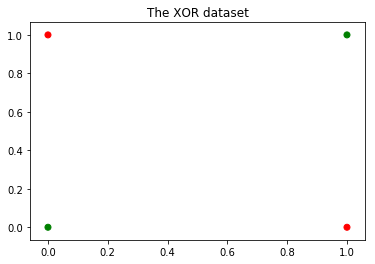

In [125]:
import matplotlib.pyplot as plt

x1 = np.array([[0],[1],[0],[1]])
x2 = np.array([[0],[0],[1],[1]])

plt.scatter(x1,x2,c=['green','red','red','green'])
plt.title('The XOR dataset')
plt.show()

O que há de importante nesse *dataset*? **Não é possível separá-lo utilizando uma reta**! Ou seja, não corresponde a um problema de classificação com classes linearmente separáveis. Um neurônio somente não conseguiria resolvê-lo, mas nossa rede pode! Vamos?

In [150]:
# Vamos compor nosso dataset X justapondo horizontalmente x1 e x2 declarados anteriormente
X = np.array([[1,1],[1,0],[0,1],[0,0]])
# Temos também de declarar os targets
y = np.array([[0],[1],[1],[0]])

l = list(zip(X,y))

print(l)

a = np.atleast_2d(l[1][0]).T
print(a)

# Agora, instanciamos e treinamos nossa rede neural!
xorNetwork = MultilayerNeuralNetwork(arch=[2,2,1], alpha=0.5)
xorNetwork.fit(X, y, batch_size=1, epochs = 20000, displayUpdate=100, max_loss=0.0000001)

[(array([1, 1]), array([0])), (array([1, 0]), array([1])), (array([0, 1]), array([1])), (array([0, 0]), array([0]))]
[[1]
 [0]]
Epoch: 1, Loss: 0.7843540
Epoch: 101, Loss: 0.4885617
Epoch: 201, Loss: 0.4667297
Epoch: 301, Loss: 0.4283654
Epoch: 401, Loss: 0.3916145
Epoch: 501, Loss: 0.3688027
Epoch: 601, Loss: 0.3526663
Epoch: 701, Loss: 0.3353332
Epoch: 801, Loss: 0.3037728
Epoch: 901, Loss: 0.2351350
Epoch: 1001, Loss: 0.1450077
Epoch: 1101, Loss: 0.0863978
Epoch: 1201, Loss: 0.0567800
Epoch: 1301, Loss: 0.0408259
Epoch: 1401, Loss: 0.0313072
Epoch: 1501, Loss: 0.0251293
Epoch: 1601, Loss: 0.0208512
Epoch: 1701, Loss: 0.0177406
Epoch: 1801, Loss: 0.0153905
Epoch: 1901, Loss: 0.0135595
Epoch: 2001, Loss: 0.0120971
Epoch: 2101, Loss: 0.0109050
Epoch: 2201, Loss: 0.0099163
Epoch: 2301, Loss: 0.0090841
Epoch: 2401, Loss: 0.0083750
Epoch: 2501, Loss: 0.0077640
Epoch: 2601, Loss: 0.0072325
Epoch: 2701, Loss: 0.0067662
Epoch: 2801, Loss: 0.0063542
Epoch: 2901, Loss: 0.0059875
Epoch: 3001, L

([0.78435400551833634,
  0.76224179999820751,
  0.73687336203341591,
  0.70885714150588286,
  0.67927408859206695,
  0.64989123721373343,
  0.61912143967834721,
  0.59205817680388084,
  0.56846821847801776,
  0.54822826128367952,
  0.53225746893322201,
  0.52167436303791981,
  0.5141521387114566,
  0.50786684017033168,
  0.50555503096804033,
  0.50394080138839281,
  0.50173746214324511,
  0.50059654207653503,
  0.49866792175306779,
  0.49809692977271025,
  0.49729488465373023,
  0.49736546401075465,
  0.49689203625797407,
  0.49676675936615189,
  0.49684560940975747,
  0.49694475232190377,
  0.49687578310246244,
  0.49664043473624464,
  0.49647171364040088,
  0.49625014364546072,
  0.49610891508004384,
  0.49610684179900705,
  0.49595381644628683,
  0.4958627902757296,
  0.49578132614129522,
  0.49570241947308546,
  0.49562786694259447,
  0.49564448979864895,
  0.49549840007109247,
  0.49537682002540062,
  0.49527339762256806,
  0.49516597176283572,
  0.49510287621317661,
  0.495011209

## MNIST

O MNIST é um *dataset* massivamente utilizado pelos estudiosos de Machine Learning composto
por imagens de dígitos de 0 a 9. Ele possui 60000 exemplos de treino e 10000 de testes. 
Os vetores de características são 784-dimensionais ($28 \times 28$ pixels por imagem),
com componentes assumindo valores em $[0,255]$. O propósito é corretamente classificar
os dígitos desse *dataset*!

A biblioteca `sklearn` oferece o uma amostra do MNIST por meio de comandos simples. 
Vamos utilizá-los para obter esse *dataset* e, com ele,
treinar uma rede neural especializada em classificar
seus dígitos de 0 a 9!


In [158]:
# Import sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

# Load a sample of MNIST through simple sklearn commands
print("[INFO] loading MNIST dataset")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())    # normalize data
print("[INFO] samples: {}, dim: {}".format(data.shape[0], data.shape[1]))

# Split the dataset into train and test
(trainX, testX, trainY, testY) = train_test_split(data, digits.target, test_size=0.25)

# Binarize labels
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# Train the neural network
print("[INFO] training network...")
mnistNN = MultilayerNeuralNetwork(arch=[trainX.shape[1], 32, 16, 10], alpha=0.1)
mnistNN.fit(trainX, trainY, epochs=1000, batch_size=30, max_loss=0.00001, displayUpdate=100)

[INFO] loading MNIST dataset
[INFO] samples: 1797, dim: 64
[INFO] training network...
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
27
Epoch: 1, Loss: 1751.6072410
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
27
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
27
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
27
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
27
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
27
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


KeyboardInterrupt: 

Uma vez treinada a rede, podemos checar seu desempenho no conjunto de testes, por meio da função `classification_report`, que fornece índices de desempenho:

In [145]:
print("[INFO] evaluating network...")
# Test the model
print(testX.shape)
predictions = mnistNN.predict(testX)
predictions = predictions.T.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

[INFO] evaluating network...
(450, 64)
             precision    recall  f1-score   support

          0       1.00      0.96      0.98        50
          1       0.96      1.00      0.98        48
          2       1.00      0.98      0.99        42
          3       0.98      1.00      0.99        50
          4       0.98      0.98      0.98        41
          5       0.98      0.98      0.98        49
          6       0.98      0.98      0.98        41
          7       0.98      1.00      0.99        47
          8       0.97      0.92      0.94        37
          9       0.98      1.00      0.99        45

avg / total       0.98      0.98      0.98       450



# Redes Neurais com Keras

O que fizemos até então geralmente não é feito na prática. Existem bibliotecas mais robustas e otimizadas para se trabalhar com redes neurais e outros modelos. O Keras é uma biblioteca para Python muito utilizada para Machine Learning e permite o treino e avaliação de redes neurais com poucas linhas de código.

In [152]:
# Import sklearn and keras tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import numpy as np

# Download the full MNIST dataset
dataset = datasets.fetch_mldata("MNIST Original")

# Normalize data
data = dataset.data.astype("float")/255.0

# Split data into sets
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

# Binarize labels
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# Prepare the feedforward neural network with keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

# Train the neural network
print("[INFO] training...")
sgd = SGD(0.1)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

Using TensorFlow backend.


[INFO] training...
Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 6s 117us/step - loss: 1.7456 - acc: 0.5229 - val_loss: 1.0489 - val_acc: 0.7161
Epoch 2/100
52500/52500 [==============================] - 4s 83us/step - loss: 0.7404 - acc: 0.8094 - val_loss: 0.5832 - val_acc: 0.8473
Epoch 3/100
52500/52500 [==============================] - 5s 87us/step - loss: 0.4951 - acc: 0.8656 - val_loss: 0.4578 - val_acc: 0.8633
Epoch 4/100
52500/52500 [==============================] - 5s 89us/step - loss: 0.4038 - acc: 0.8886 - val_loss: 0.3985 - val_acc: 0.8883
Epoch 5/100
52500/52500 [==============================] - 4s 81us/step - loss: 0.3598 - acc: 0.8988 - val_loss: 0.3597 - val_acc: 0.8967
Epoch 6/100
52500/52500 [==============================] - 4s 80us/step - loss: 0.3340 - acc: 0.9052 - val_loss: 0.3424 - val_acc: 0.9020
Epoch 7/100
52500/52500 [==============================] - 4s 80us/step - loss: 0.3163 - acc: 0.9091 -

KeyboardInterrupt: 